**<h1>Introduction</h1>**
<hr>

# **Imports**

Below are all the **imports** that are required in the **notebook**.

In [ ]:
# Common
import os
import numpy as np
import tensorflow as tf
import pickle

# TFRecords Loading
from tensorflow import io
from tensorflow import data as tfd
from tensorflow import train as tft
from tensorflow import image as tfi

# Data Loading 
from keras.preprocessing.image import ImageDataGenerator  as IDG

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt

# Models 
from keras.layers import Dense, GlobalAveragePooling2D as GAP, Dropout
from keras.models import load_model, Sequential

# Pre Trained Models
from tensorflow.keras.applications import ResNet50V2, InceptionV3, Xception, ResNet50, ResNet152V2

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

!pip install tensorflow-gpu==2.9
import requests
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree

import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2
from PIL import Image
import scipy
!sudo pip3 install tensorflowjs
!sudo tensorflowjs_converter


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting unin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Enable the auto mixed precision for better training speed.

In [ ]:
os.environ['ENABLE_AUTO_MIXED_PRECISION']  = '1'

# **Data Distribution**

Before loading the data, it is **important to understand the data distribution and the class distribution**. Because our **final model** can be **affected** by the **class distribution**.

In [ ]:
# Specify the root path.
train_path = '/content/drive/MyDrive/Zoodo/Fast Food Classification V2 det/Train'
valid_path = '/content/drive/MyDrive/Zoodo/Fast Food Classification V2 det/Valid'

In [ ]:
import pathlib
train_dir = pathlib.Path("/content/drive/MyDrive/Zoodo/Fast Food Classification V2 det/TFRecords/Train")
valid_dir = pathlib.Path("/content/drive/MyDrive/Zoodo/Fast Food Classification V2 det/TFRecords/Valid")
test_dir = pathlib.Path("//content/drive/MyDrive/Zoodo/Fast Food Classification V2 det/TFRecords/Test")

In [ ]:
# Collecte the class names.
class_names = sorted(os.listdir(train_path))
n_classes = len(class_names)

# Print
print("No. Classes : {}".format(n_classes))
print("Classes     : {}".format(class_names))

No. Classes : 10
Classes     : ['Baked Potato', 'Burger', 'Crispy Chicken', 'Donut', 'Fries', 'Hot Dog', 'Pizza', 'Sandwich', 'Taco', 'Taquito']


**Great!** Even in the **validation data**, all classes are **equally distributed**. So the **model predictions cannot be just random guesses**.

Setting a higher batch size does not affect the model's performance, but it do affects the GPU usage. **For better utilization of the GPU, a higher batch size is set for the training data**.

# **Data Visulization**

**Before framing the final model**, we need to have a **look at the data set** so that we can decide the **model configurations**.

# **TFRecords Loading**

The below functions will **decode the data** and apply little bit of **data augmentation**.

Similarly, let's load the **validation data**.

**Processing and loading data** using **Tensorflow records** allow **better utilization of memory**, as well as the **tensorflow environment**.

Just like we plotted the images for **Image Data Generator data**, let's plot the images for the **Tensorflow Records**.

The **only difference** between this data and the original data is that the **tensorflow records** data is already **resized to 256 by 256 pixels**.

# **Load Model**

I have already trained in the model, and the **model weights** are **available in the associated data set**. So let's **load those weights**.

In [ ]:
model = load_model('/content/drive/MyDrive/Zoodo/new_model_to_predit_food.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

Save the model 

In [ ]:
model.save("model.hdf5")

In [ ]:

with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)


In [ ]:
!tensorflowjs_converter --input_format=keras '/content/drive/MyDrive/Zoodo/new_model_to_predit_food.h5' "/content/drive/MyDrive/Zoodo"

Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 5, in <module>
    from tensorflowjs.converters.converter import pip_main
  File "/usr/local/lib/python3.9/dist-packages/tensorflowjs/__init__.py", line 21, in <module>
    from tensorflowjs import converters
  File "/usr/local/lib/python3.9/dist-packages/tensorflowjs/converters/__init__.py", line 21, in <module>
    from tensorflowjs.converters.converter import convert
  File "/usr/local/lib/python3.9/dist-packages/tensorflowjs/converters/converter.py", line 29, in <module>
    import tensorflow.compat.v1 as tf1
  File "/usr/local/lib/python3.9/dist-packages/tensorflow/__init__.py", line 473, in <module>
    keras._load()
  File "/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/lazy_loader.py", line 41, in _load
    module = importlib.import_module(self.__name__)
  File "/usr/lib/python3.9/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:]

In [ ]:
model.save('/content/drive/MyDrive/Zoodo/saved_model.pb')

In [ ]:
food_list = os.listdir(r'/content/drive/MyDrive/Zoodo/Fast Food Classification V2 det/Test')
food_list


['Crispy Chicken',
 'Hot Dog',
 'Fries',
 'Taco',
 'Baked Potato',
 'Donut',
 'Burger',
 'Taquito',
 'Sandwich',
 'Pizza']

# **Model Prediction**

The model made a few errors, like it **classified a Sandwich as Burger**. But if you look at the image, you will find that the **features of that image for being sandwich is relatively lower than the features for being burger**. What I found that whenever the **model prediction** does **not matches** with the **actual class**, the image is skewed.

---
**DeepNets**

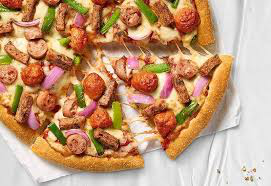

In [ ]:
testing_taco = ('/content/drive/MyDrive/Zoodo/Fast Food Classification V2 det/Test/Pizza/Pizza-Test (116).jpeg')
Image.open(testing_taco)

In [ ]:
# Convert image to array

path = str(testing_taco)

img = tf.keras.utils.load_img(
    path, target_size=[180, 180]
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions)
score1 = 100 * np.max(score)
if score1<99.6:
  print("This is not a food")
else :
  print(
    f"This image most likely belongs to {class_names[np.argmax(score)]}"
    f"\nWith a {100 * np.max(score)} percent confidene"
)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 966ms/step
This image most likely belongs to Pizza
With a 99.71016049385071 percent confidene


In [ ]:
food=class_names[np.argmax(score)]
food

'Pizza'

In [ ]:
import pandas as pd
path='//content/drive/MyDrive/Zoodo/Fast Food Classification V2 det/Health report .xlsx'
my_data = pd.read_excel(path)

In [ ]:
!wget https://raw.githubusercontent.com/adeshpande3/Pandas-Tutorial/master/RegularSeasonCompactResults.csv

In [ ]:
%pip freeze

In [ ]:
!pip install pytrends

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import files
uploaded1 = files.upload()

In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Health report .xlsx']))
df

KeyError: ignored

In [ ]:
import json
import itertools
import pandas as pd
import numpy as np

In [ ]:
Foodh = df.groupby('Food')

In [ ]:
Foodh.first()

In [ ]:
Foodh.get_group(food)

In [ ]:
import io
df1 = pd.read_excel(io.BytesIO(uploaded1['nutrition.xlsx']))
df1

In [ ]:
Foodh1 = df1.groupby('Items')

In [ ]:
Foodh1.first()

In [ ]:
Foodh1.get_group(food)

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Zoodo/new_model_to_predit_food.h5')


NameError: ignored

In [ ]:
from keras.models import load_model



# Convert the model to JSON format
model_json = model.to_json()

# Save the JSON model architecture to a file
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

# Save the model weights to a file
model.save_weights('model_weights.bin')


In [ ]:
json_model = model.to_json()


In [ ]:
with open('/content/drive/MyDrive/Zoodo/new_model_to_predit_food.json', 'w') as json_file:
    json_file.write(json_model)


In [ ]:
model.save_weights('/content/drive/MyDrive/Zoodo/new_model_to_predit_food_weights.h5')


In [ ]:
with open('/content/drive/MyDrive/Zoodo/new_model_to_predit_food.json', 'r') as json_file:
    json_model = json_file.read()
model = keras.models.model_from_json(json_model)
model.load_weights('/content/drive/MyDrive/Zoodo/new_model_to_predit_food_weights.h5')
